# Game Sales

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

## 1 分析の目的

世界のゲームの販売データから地域別の販売傾向を分析します。

![](images/video-game-sales-screenshot.png)

データは Kaggle Dataset [Video Game Sales](https://www.kaggle.com/gregorut/videogamesales) から入手したものを本講座用に加工したものを使います。

## 2 データ

集計対象は、1980年から2016年10月までの世界のゲームの販売データです。データは以下の二つのファイルに分割されています。

- `game_sales.csv`: ゲームタイトルの販売数を地域別に記録したデータ
- `game_info.csv`: ゲームタイトルの情報を記録したデータ

## 3 データの読み込みと確認

### データの読み込み 

`data/game_sales.csv` を `DataFrame` として読み込んで `game_sales` と名付けて下さい。`game_sales.csv` に記録されているデータは16598行、6列で、各行は

- `ID`: ゲームタイトルのID
- `NA_Sales`: 北米での販売数
- `EU_Sales`: 欧州での販売数
- `JP_Sales`: 日本での販売数
- `Other_Sales`: その他地域での販売数
- `Global_Sales`: 全世界での販売数

となっています。販売数の単位は100万本です。

In [3]:
# data/game_sales.csv を DataFrame として読み込んで game_sales と名付けて下さい。
game_sales = pd.read_csv('data/game_sales.csv', index_col=0)
game_sales.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
ID,,,,,
18690,0.09,0.18,0.01,0.10,0.37
16381,0.11,0.15,0.00,0.06,0.32
7473,0.00,0.00,0.02,0.00,0.02
12972,0.41,0.11,0.00,0.04,0.55
4354,0.01,0.00,0.00,0.00,0.01


### データの確認

データの行数と列数が正しいかどうかを確認します。

In [4]:
# game_sales の行数と列数が正しいことを確認してください。
game_sales.shape

(16598, 5)

各列のデータ型を確認します。データ型を変換する必要があるのかどうかを確認します。

In [5]:
# 各列のデータ型を確認してください。
game_sales.dtypes

NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

データの要約統計量を確認します。確認するべき点は

- データの欠損
- 外れ値
- 矛盾のある数値

In [6]:
# データの要約統計量を確認してください。
#各地域全世界の販売数。販売数なので0より大きくないとおかしい。まず可視化させておかしい値を見てみる。
game_sales.describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16593.000000,16598.000000,16583.000000
mean,0.264667,0.146652,0.077638,0.048063,0.537739
std,0.816683,0.505351,0.309496,0.188588,1.555655
min,0.000000,0.000000,-0.500000,0.000000,0.010000
25%,0.000000,0.000000,0.000000,0.000000,0.060000
50%,0.080000,0.020000,0.000000,0.010000,0.170000
75%,0.240000,0.110000,0.040000,0.040000,0.470000
max,41.490000,29.020000,10.220000,10.570000,82.740000


In [7]:
# 外れ値や欠損のあるレコードを確認してください。
game_sales.query('JP_Sales < 0')

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
ID,,,,,
15893,0.00,0.08,-0.5,0.01,NaN
5164,0.03,0.01,-0.5,0.00,NaN
5126,0.09,0.00,-0.5,0.01,NaN
13629,0.00,0.00,-0.5,0.00,NaN
13893,0.01,0.00,-0.5,0.00,NaN


In [8]:
#Global_Salesもおかしいことがわかる。
#データ全体で欠損がないか確認する
#データ欠損のある箇所を取り出す。
game_sales[game_sales.isnull().any(axis=1)]
#Global_Salesには欠損値がたくさんあり、JP_Salesにも欠損があることがわかる。

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
ID,,,,,
1738,0.00,0.00,NaN,0.00,NaN
239,0.10,0.08,0.00,0.03,NaN
10421,0.20,0.08,0.00,0.01,NaN
15893,0.00,0.08,-0.50,0.01,NaN
8960,1.52,0.10,0.00,0.02,NaN
13236,0.00,0.00,0.01,0.00,NaN
6793,0.10,0.04,0.00,0.00,NaN
2450,0.00,0.00,NaN,0.00,NaN
9700,0.02,0.02,NaN,0.01,NaN


In [9]:
#ステップ1 -0.50と言われても何が正しいかわからない。　→　削除する。
# ステップ2Global_Salesは他の地域の和である。　なので和をもとめて置き換える。


### 外れ値や欠損データの処理

外れ値や欠損のある場合はそれらを含むレコードを処理してください。

In [10]:
tmp_1 = game_sales.query('JP_Sales >= 0')

In [11]:
#取り除かれたか確認
tmp_1.query('JP_Sales <= 0')

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
ID,,,,,
16381,0.11,0.15,0.0,0.06,0.32
12972,0.41,0.11,0.0,0.04,0.55
4354,0.01,0.00,0.0,0.00,0.01
14541,0.10,0.07,0.0,0.02,0.18
10424,0.08,0.00,0.0,0.01,0.09
11851,0.02,0.01,0.0,0.00,0.03
18470,0.13,0.03,0.0,0.00,0.17
17354,1.69,0.04,0.0,0.01,1.74
15397,0.00,0.14,0.0,0.02,0.16


In [12]:
#確認するとJP_Salesのデータ欠損は取り除かれたことがわかる。
#Global_Salesはまだ欠損値がある。　→　Global_Salesを各地域の和に置き換える。
tmp_1[tmp_1.isnull().any(axis=1)]

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
ID,,,,,
239,0.10,0.08,0.00,0.03,NaN
10421,0.20,0.08,0.00,0.01,NaN
8960,1.52,0.10,0.00,0.02,NaN
13236,0.00,0.00,0.01,0.00,NaN
6793,0.10,0.04,0.00,0.00,NaN


In [13]:
#処理の概要：　販売数の総和を求める 
#1,列を取り出す。
#2,和を求める 
#3,global_salesの値を求める

# 1,列を取り出す。　2,和を求める
#tmp_1[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum(axis=1)

#3. global_salesの値を求める
tmp_2 = tmp_1.fillna({
    'Global_Sales': tmp_1[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum(axis=1)
})
#データ欠損がなくなっているか確認する。　→　欠損がなくなっていることを確認する。
tmp_2[tmp_2.isnull().any(axis=1)]

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
ID,,,,,


In [14]:
#欠損値を取り除いた値を格納し直す。
game_sales = tmp_2

### 演習問題

`data/game_info.csv` を `DataFrame` として読み込んで `game_info` という変数にしてください。`game_info.csv` に記録されているデータは16598行、6列で、各行は

- `ID`: ゲームタイトルのID
- `Rank`: 販売数での順位
- `Name`: 名前
- `Year`: 発売年
- `Platform`: プラットフォーム (PS4、Wii等)
- `Genre`: ジャンル
- `Publisher`: 販売会社

となっています。

#### データの読み込み

In [15]:
# data/game_sales.csv を DataFrame として読み込んで game_info と名付けて下さい。
game_info = pd.read_csv('data/game_info.csv', index_col=0)

#### データの確認

In [16]:
# game_info の行数と列数を確認してください。
game_info.shape

(16598, 6)

In [17]:
# 各列のデータ型を確認してください。
game_info.dtypes

Rank           int64
Name          object
Platform      object
Year         float64
Genre         object
Publisher     object
dtype: object

In [18]:
# データの要約統計量を確認してください。
game_info.describe()

,Rank,Year
count,16598.000000,16327.000000
mean,8300.605254,2006.406443
std,4791.853933,5.828981
min,1.000000,1980.000000
25%,4151.250000,2003.000000
50%,8300.500000,2007.000000
75%,12449.750000,2010.000000
max,16600.000000,2020.000000


In [19]:
#欠損値の確認
game_info[game_info.isnull().any(axis=1)]

#NAN
game_info= game_info.dropna()
# Year をint型にする
game_info['Year'] = game_info['Year'].astype('int')

In [20]:
# 2016年以前のものを抽出する
game_info = game_info.query('Year <= 2016')
game_info

,Rank,Name,Platform,Year,Genre,Publisher
ID,,,,,,
4833,1,Wii Sports,Wii,2006,Sports,Nintendo
8443,2,Super Mario Bros.,NES,1985,Platform,Nintendo
17315,3,Mario Kart Wii,Wii,2008,Racing,Nintendo
15726,4,Wii Sports Resort,Wii,2009,Sports,Nintendo
17712,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo
679,6,Tetris,GB,1989,Puzzle,Nintendo
732,7,New Super Mario Bros.,DS,2006,Platform,Nintendo
3967,8,Wii Play,Wii,2006,Misc,Nintendo
16221,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo


#### 外れ値や欠損データの処理

In [21]:
# 外れ値や欠損のある場合はそれらを含むレコードを処理してください。


## 4 データ加工と基礎集計

### データのマージ

集計に必要な情報が二つのテーブル（`game_sales` と `game_info`）に分離しているため一つにまとめます。この作業をマージと呼びます。確認すべき点は

- マージ前後での件数の変化と
- マージ後の欠損データの有無

です。

In [22]:
# game_sales と game_info をマージして game_data と名付けてください。
game_data = pd.concat([game_sales, game_info], axis=1, join='inner')

In [23]:
game_data.shape

(16277, 11)

In [24]:
game_data.dtypes

NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
Rank              int64
Name             object
Platform         object
Year              int64
Genre            object
Publisher        object
dtype: object

今回は2001年から2015年までの期間を対象にするので、この期間外のデータを削除します。

In [25]:
game_data.query('Year > 2000 & Year < 2016', inplace=True)
game_data.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Rank,Name,Platform,Year,Genre,Publisher
ID,,,,,,,,,,,
18690,0.09,0.18,0.01,0.10,0.37,5113,Prince of Persia: The Forgotten Sands,PSP,2010,Action,Ubisoft
16381,0.11,0.15,0.00,0.06,0.32,5603,Overlord II,PS3,2009,Action,Codemasters
7473,0.00,0.00,0.02,0.00,0.02,15860,Kadenz fermata//Akkord:fortissimo,PSV,2014,Adventure,5pb
12972,0.41,0.11,0.00,0.04,0.55,3632,ZhuZhu Pets 2: Featuring The Wild Bunch,DS,2010,Simulation,Activision
4354,0.01,0.00,0.00,0.00,0.01,16587,Bust-A-Move 3000,GC,2003,Puzzle,Ubisoft


In [26]:
# game_data の行数と列数を確認してください
game_data.shape

(13613, 11)

In [27]:
# game_data の各列のデータ型を確認してください。
game_data.dtypes

NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
Rank              int64
Name             object
Platform         object
Year              int64
Genre            object
Publisher        object
dtype: object

In [28]:
# game_data の要約統計量を確認してください。
game_data.describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Rank,Year
count,13613.000000,13613.000000,13613.000000,13613.000000,13613.000000,13613.000000,13613.000000
mean,0.249628,0.147868,0.055293,0.052518,0.505617,8503.209946,2007.944906
std,0.730933,0.525472,0.249835,0.205090,1.501231,4781.767702,3.736084
min,0.000000,0.000000,0.000000,0.000000,0.010000,1.000000,2001.000000
25%,0.000000,0.000000,0.000000,0.000000,0.060000,4359.000000,2005.000000
50%,0.080000,0.020000,0.000000,0.010000,0.160000,8603.000000,2008.000000
75%,0.230000,0.110000,0.030000,0.040000,0.450000,12662.000000,2011.000000
max,41.490000,29.020000,6.500000,10.570000,82.740000,16600.000000,2015.000000


In [29]:
game_data.describe(include=['O'])

,Name,Platform,Genre,Publisher
count,13613,13613,13613,13613
unique,9105,20,12,434
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2128,2857,1180


### 各列の分布の確認

分布の集計と可視化の方法は、データ型によって異なります。

| データ型 |       集計      |       可視化      |
|:--------:|:---------------:|:-----------------:|
|   数値   |  四分位数、分散  |    ヒストグラム   |
| カテゴリ | ユニーク数、分布 | 棒グラフ、円グラフ |

数値データの分布を確認します。全世界での売上本数の四分位数と分散を確認します。

In [30]:
# 全世界での売上数の要約統計量を確認してください。
#メモ：　集計方法はいろいろあるができるだけ大きいスコープから求めるのが良い。
#　そこから時間的な推移など徐々にブレークダウンしていく。(データ欠損はない)
game_data['Global_Sales'].describe()
#ここから何が言えるのか？データから。
#販売数売り上げの単位は１００万。mean(平均)が50万は少ないのでは？
#しかし最大値(max)をみると8300万
#しぶんい数(75%)も大したことないのに
#　結論：売れているものはめちゃくちゃ売れてるが、そうでないものはあまり売れていないことが言える

count    13613.000000
mean         0.505617
std          1.501231
min          0.010000
25%          0.060000
50%          0.160000
75%          0.450000
max         82.740000
Name: Global_Sales, dtype: float64

全世界での売上本数の分布をヒストグラムから確認します。

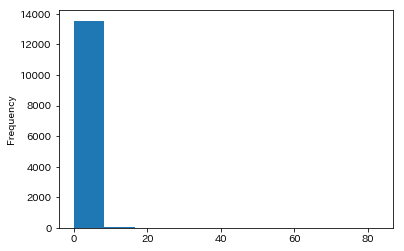

In [31]:
# 全世界での売上数のヒストグラムをプロットしてください。
game_data['Global_Sales'].plot.hist()
#ヒストグラムの見方　x軸　　Y軸　本数　0から10万まで
#このグラフだと全体の傾向がわからない。　→　ヒストグラムの棒の数を増やしてみる。

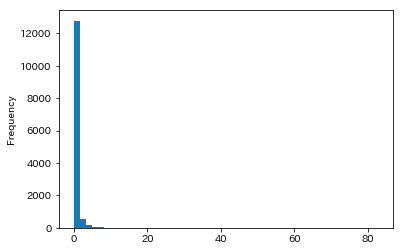

In [32]:
#売れてるのと　売れてないのでさが大きいためよくわからない
game_data['Global_Sales'].plot.hist(bins=50)
#ので

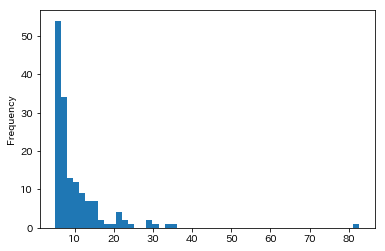

In [33]:
#スクリーニングを行う(50万以上売れたゲームを可視化させる)
game_data.query('Global_Sales > 5')['Global_Sales'].plot.hist(bins=50)

カテゴリデータの分布を確認します。各年に発売されたゲームの分布数を確認します。

In [34]:
#各年に発売されたゲームタイトル数の分布を確認してください。
titles_by_year=game_data['Year'].value_counts().sort_index()
titles_by_year
# 分析 2009年に販売数がピーク。近年は下降気味であることがわかる。

2001     482
2002     828
2003     775
2004     744
2005     934
2006    1008
2007    1201
2008    1428
2009    1429
2010    1257
2011    1134
2012     655
2013     545
2014     579
2015     614
Name: Year, dtype: int64

各年に発売されたゲームの分布を棒グラフで確認します。

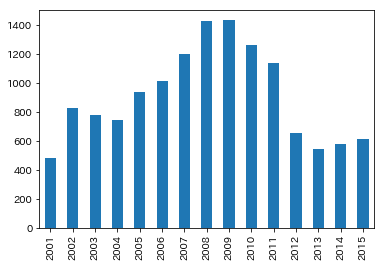

In [35]:
# 各年に発売されたゲームタイトル数を棒グラフとしてプロットしてください。
titles_by_year.plot.bar()
#数字だけで見た場合と同様であることがわかる。数値だけではわからなかった細かいことがわかる
#2004 ~ 2005で何かがありゲームの販売数が上がった。

### 練習問題

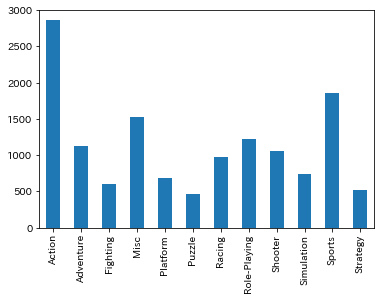

In [36]:
# ジャンルごとのゲームタイトルの数を棒グラフにして可視化して下さい。
titles_by_Genre=game_data['Genre'].value_counts().sort_index()
titles_by_Genre.plot.bar()

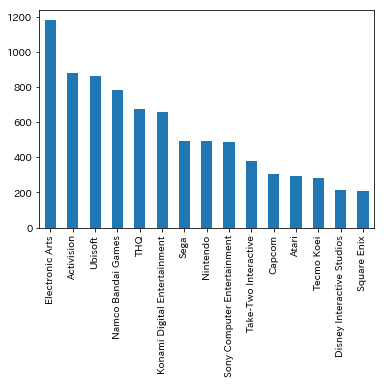

In [37]:
# ゲームタイトル数がトップ15の販売会社のゲームタイトル数を棒グラフでプロットしてください。

#手順を検討　
#並べ替える
#15行とる
#プロットする
titles_by_Publisher =game_data['Publisher'].value_counts().head(15).plot.bar()
#このグラフから何が言えるのか？


## 5 可視化

- 今回の分析の目的は、地域別の売上傾向を分析すること
- 全体の傾向と地域別の傾向を比較して知見を得る

### 集計対象の整理

アウトプットをイメージして集計対象を整理します。

|        集計項目        |            利用する要素            |    可視化    |
|:----------------------:|:----------------------------------:|:------------:|
|    地域別の販売割合    |           各地域の販売数           |   円グラフ   |
|      年別の販売数      |        各地域の年別の販売数        | 線、面グラフ |
|   ジャンル別の販売数   |     各地域のジャンル別の販売数     |   棒グラフ   |
| プラットフォーム別の販売数 | 各地域のプラットフォーム別の販売数 |   棒グラフ   |

### クロス集計と可視化

これから先の集計で地域別販売数の列名のリスト `['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']` が何度も必要になります。このリストを `SALES` と名付けます。

In [38]:
SALES = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

#### 地域別の販売シェア

各地域の販売シェアを集計して可視化します。

In [39]:
# 地域別販売数を集計してください。
sales_by_region=game_data[SALES].sum().sort_values()
# 結果を昇順に並べ替えて sales_by_region と名付けてください。
sales_by_region

Other_Sales     714.93
JP_Sales        752.70
EU_Sales       2012.93
NA_Sales       3398.19
dtype: float64

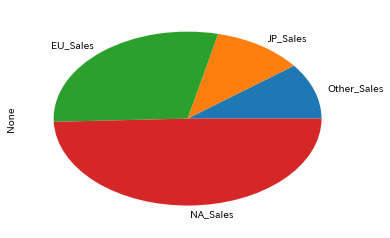

In [40]:
# sales_by_region を円グラフにプロットしてください。
sales_by_region.plot.pie()
#このグラフから読み取れることは何か？
#日本のSalesは3番目である。あたり前のことでも自分で書き留めることが大切。(忘れない)
#またここで読み取った結果から次の集計に活かすことができる。

グラフから読み取れることはなんですか？

In [41]:
- 販売数約50%は北米
-　日本は３位
#グラフから読み取った当たり前のことを記載する。

SyntaxError: invalid character in identifier (<ipython-input-41-62df0bfc827b>, line 2)

#### 地域別の販売数およびシェアの推移

地域別販売数の推移を集計して可視化します。

In [43]:
# 発売年ごとの地域別販売数を集計してください。結果を sales_by_year と名付けてください。
sales_by_year = game_data.groupby('Year')[SALES].sum()

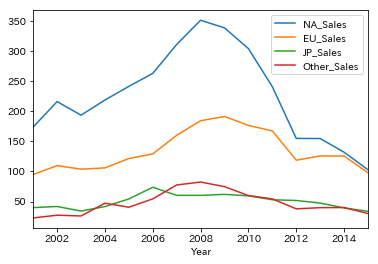

In [44]:
# sales_by_year をX軸に発売年、Y軸に販売数を地域別の線グラフとしてプロットしてください。
sales_by_year.plot()
#何が読み取れるか記載する。
#NA_Salesが高い。
#全体として2008年に販売数が上がっている。
#2012年は全体的に下降気味である

地域別の販売数のシェアの推移を集計して可視化します。

In [226]:
# sales_by_year の各年の地域ごとの販売数をそれらの総和で割ってください。
# 結果を share_by_year と名付けてください。
share_by_year = sales_by_year.apply(lambda x : x / sales_by_platform.sum(axis=1))
share_by_year

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Year,,,,
2001,0.524842,0.286253,0.120245,0.068660
2002,0.547347,0.277851,0.105732,0.069070
2003,0.541344,0.290288,0.095635,0.072733
2004,0.529001,0.256087,0.100699,0.114214
2005,0.527496,0.265419,0.118546,0.088538
2006,0.505495,0.248290,0.141647,0.104569
2007,0.510776,0.262922,0.098961,0.127341
2008,0.517974,0.271780,0.088815,0.121431
2009,0.507986,0.287098,0.092815,0.112101


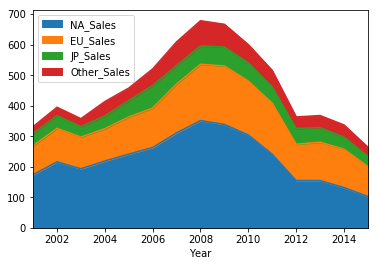

In [227]:
# share_by_year を面グラフとしてプロットして下さい。
#
# Hint: 面グラフは、DataFrame.plot.area() でプロットすることができます。
sales_by_year.plot.area()

グラフから読み取れることはなんですか？

#### 各地域でのジャンル別の販売数および販売シェア

ジャンル別の販売数を地域別に集計して可視化します。

In [232]:
# ジャンルごとに地域別販売数を集計してください。結果を sales_by_genre と名付けてください。
sales_by_genre = game_data.groupby('Genre')[SALES].sum()
sales_by_genre.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,727.08,454.86,121.21,174.33
Adventure,81.20,48.96,35.03,14.84
Fighting,149.72,68.05,41.07,30.38
Misc,355.27,192.88,81.50,71.00
Platform,250.44,135.75,52.54,40.81


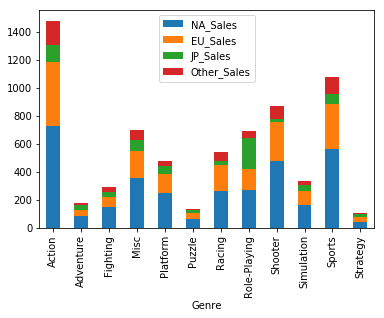

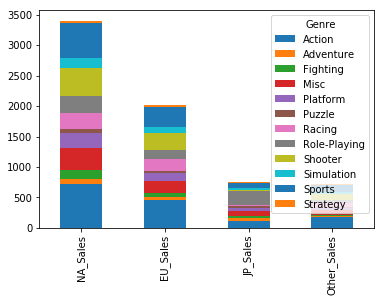

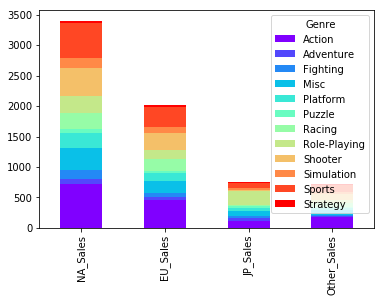

In [235]:
# sales_by_genre を、X軸に地域、Y軸にジャンル別の販売数を
# 積み上げ棒グラフとしてプロットしてください。
sales_by_genre.plot.bar(stacked=True)
#積み上げ型で表示してみる。がX軸がジャンル　Yが地域と逆であることがわかる
#transpose()で反転させる。
sales_by_genre.transpose().plot.bar(stacked=True)
#見やすくする。cmap='rainbow'
sales_by_genre.transpose().plot.bar(stacked=True, cmap='rainbow')
#図からなんとも言えないのでやる

ジャンル別の販売数のシェアを地域別に集計して可視化します。

In [239]:
# sales_by_genre の各ジャンルの販売数をそれらの総和で割ってください。
# 結果を share_by_genre と名付けてください。

#やり方：　各行の総和でかく行の値を割ればいい
share_by_genre = share_by_genre.apply(lambda x : x / sales_by_platform.sum(axis=0), axis=1)


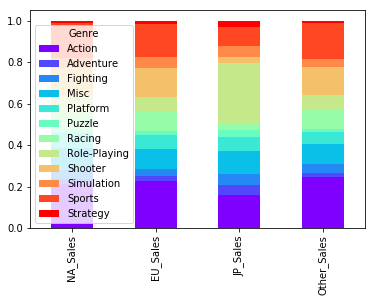

In [242]:
# share_by_genre をX軸に地域、Y軸にジャンル別の販売シャアの
# 積み上げ棒グラフとしてプロットしてください。
share_by_genre.transpose().plot.bar(stacked=True, cmap='rainbow')

グラフから読み取れることはなんですか？

In [ ]:
#action と　Strategyが多い
#日本のRPGのシェアが他の国よりも多い。


#### 各地域でのプラットフォーム別の販売数および販売シェア

プラットフォーム別の販売数を地域別に集計して可視化します。

In [50]:
# プラットフォームごとに地域別販売数を集計してください。
# 結果を sales_by_platform と名付けてください。
sales_by_platform = game_data.groupby('Platform')[SALES].sum()
sales_by_platform.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Platform,,,,
3DS,77.20,57.72,92.20,12.43
DC,0.00,0.00,1.42,0.00
DS,388.26,193.90,175.00,60.26
GB,2.73,1.67,4.65,0.19
GBA,178.34,72.46,46.56,7.51


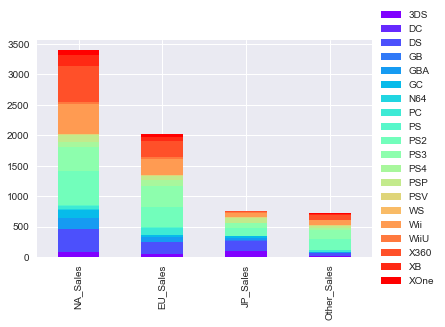

In [51]:
# sales_by_platform を、X軸に地域、Y軸にプラットフォーム別の販売数を
# 積み上げ棒グラフとしてプロットしてください。
fig, ax = plt.subplots()
(sales_by_platform
 .transpose()
 .plot.bar(stacked=True, cmap='rainbow', ax=ax))
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

プラットフォーム別の販売数のシェアを地域別に集計して可視化します。

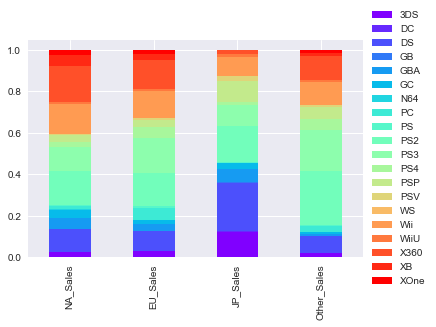

In [52]:
# sales_by_platform のプラットフォーム別の販売数をそれらの総和で割ってください。
# 結果を積み上げ棒グラフとしてプロットしてください。
fig, ax = plt.subplots()
(sales_by_platform
 .apply(lambda x : x / sales_by_platform.sum(axis=0), axis=1)
 .transpose()
 .plot.bar(stacked=True, cmap='rainbow', ax=ax))
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

グラフから読み取れることはなんですか？

In [ ]:
・全体ではDS系　xbox系の販売数が多い
・日本ではDS系の割合が大きく、xbox系の販売が少ない
・北米ではxboxの割合が多い

#### 各地域での販売数トップ15のゲームタイトル

全世界での販売数がトップ15のゲームタイトルの地域別販売数を抽出して可視化します。

In [263]:
# game_data から全世界での販売数が上位15のゲームタイトルの
# 地域別販売数を抽出してください。結果を top15_global と名付けてください。
top15_global = game_data.sort_values(by='Global_Sales',ascending=False).head(15)[['Name']+ SALES].set_index('Name')

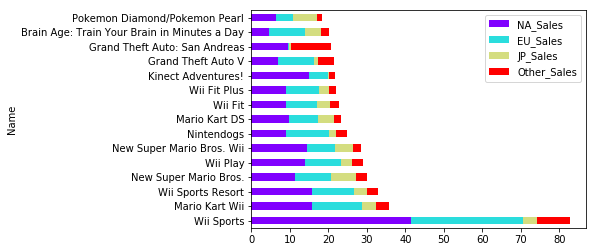

In [265]:
# top15_global をX軸がゲームタイトル、Y軸が地域別販売数の
# 積み上げ横棒グラフとしてプロットしてください。
top15_global.plot.barh(stacked=True, cmap='rainbow')

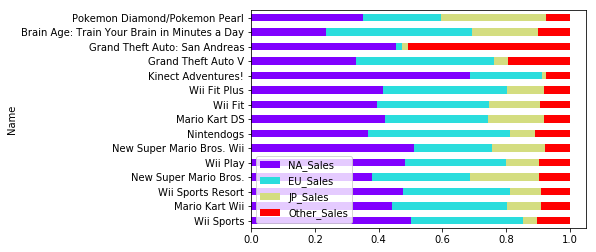

In [279]:
# top15_global をX軸がゲームタイトル、Y軸が地域別販売シェアの
# 積み上げ横棒グラフとしてプロットしてください。
#sales_by_year.apply(lambda x : x / sales_by_platform.sum(axis=1))
top15_global.apply(lambda x : x / top15_global.sum(axis=1)).plot.barh(stacked=True, cmap='rainbow')

グラフから読み取れることはなんですか？

北米での販売数が上位15のゲームタイトルの地域別販売数を抽出して可視化します。

In [56]:
# game_data から北米での販売数が上位15のゲームタイトルの
# 地域別販売数を抽出してください。結果を top15_na と名付けてください。
top15_na = (game_data
         .sort_values('NA_Sales', ascending=False)
         .head(15)[['Name'] + SALES]
         .set_index('Name'))
top15_na.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Name,,,,
Wii Sports,41.49,29.02,3.77,8.46
Mario Kart Wii,15.85,12.88,3.79,3.31
Wii Sports Resort,15.75,11.01,3.28,2.96
Kinect Adventures!,14.97,4.94,0.24,1.67
New Super Mario Bros. Wii,14.59,7.06,4.70,2.26


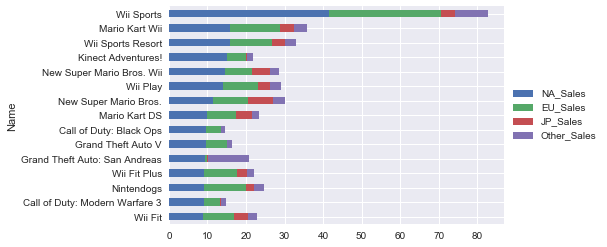

In [57]:
# top15_na をX軸がゲームタイトル、Y軸が地域別販売数の
# 積み上げ横棒グラフとしてプロットしてください。
fig, ax = plt.subplots()
top15_na.plot.barh(stacked=True, ax=ax)
ax.invert_yaxis()
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

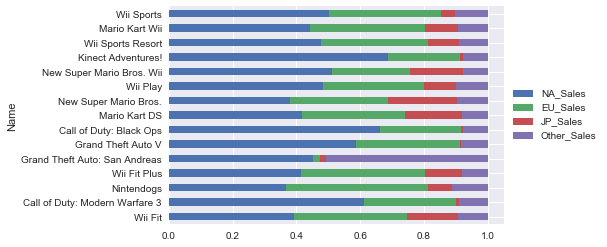

In [58]:
# top15_na をX軸がゲームタイトル、Y軸が地域別販売シェアの
# 積み上げ横棒グラフとしてプロットしてください。
fig, ax = plt.subplots()
(top15_na
 .apply(lambda x : x / top15_na.sum(axis=1))
 .plot.barh(stacked=True, ax=ax))
ax.invert_yaxis()
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

グラフから読み取れることはなんですか？

欧州での販売数がトップ15のゲームタイトルの地域別販売数を抽出して可視化します。

In [59]:
# game_data から欧州での販売数が上位15のゲームタイトルの
# 地域別販売数を抽出してください。結果を top15_eu と名付けてください。
top15_eu = (game_data
         .sort_values('EU_Sales', ascending=False)
         .head(15)[['Name'] + SALES]
         .set_index('Name'))
top15_eu.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Name,,,,
Wii Sports,41.49,29.02,3.77,8.46
Mario Kart Wii,15.85,12.88,3.79,3.31
Wii Sports Resort,15.75,11.01,3.28,2.96
Nintendogs,9.07,11.00,1.93,2.75
Grand Theft Auto V,7.01,9.27,0.97,4.14


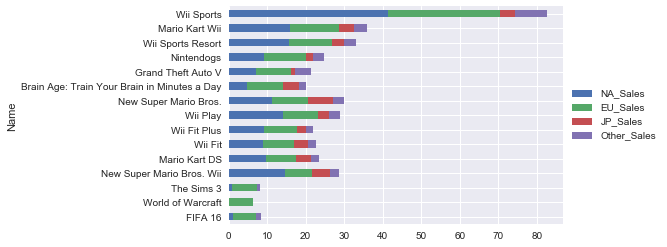

In [60]:
# top15_eu をX軸がゲームタイトル、Y軸が地域別販売数の
# 積み上げ横棒グラフとしてプロットしてください。
fig, ax = plt.subplots()
top15_eu.plot.barh(stacked=True, ax=ax)
ax.invert_yaxis()
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

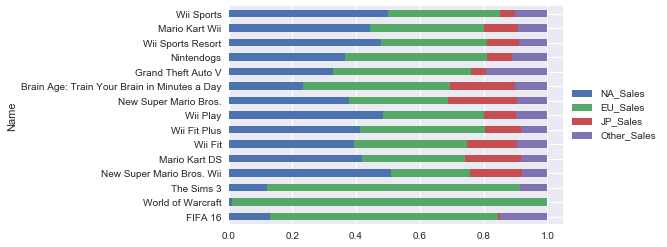

In [61]:
# top15_eu をX軸がゲームタイトル、Y軸が地域別販売シェアの
# 積み上げ横棒グラフとしてプロットしてください。
fig, ax = plt.subplots()
(top15_eu
 .apply(lambda x : x / top15_eu.sum(axis=1))
 .plot.barh(stacked=True, ax=ax))
ax.invert_yaxis()
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

グラフから読み取れることはなんですか？

日本での販売数が上位15のゲームタイトルの地域別販売数を抽出して可視化します。

In [62]:
# game_data から日本での販売数が上位15のゲームタイトルの
# 地域別販売数を抽出してください。結果を top15_jp と名付けてください。
top15_jp = (game_data
         .sort_values('JP_Sales', ascending=False)
         .head(15)[['Name'] + ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
         .set_index('Name'))
top15_jp.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Name,,,,
New Super Mario Bros.,11.38,9.23,6.50,2.90
Pokemon Diamond/Pokemon Pearl,6.42,4.52,6.04,1.37
Pokemon Black/Pokemon White,5.57,3.28,5.65,0.82
Pokemon Ruby/Pokemon Sapphire,6.06,3.90,5.38,0.50
Animal Crossing: Wild World,2.55,3.52,5.33,0.88


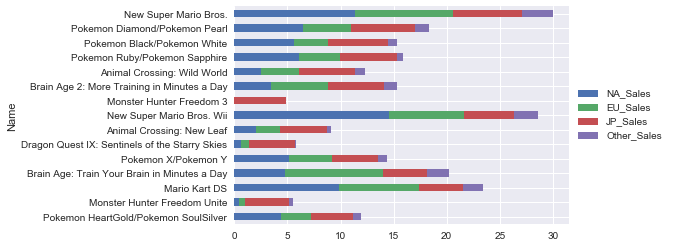

In [63]:
# top15_jp をX軸がゲームタイトル、Y軸が地域別販売数の
# 積み上げ横棒グラフとしてプロットしてください。
fig, ax = plt.subplots()
top15_jp.plot.barh(stacked=True, ax=ax)
ax.invert_yaxis()
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

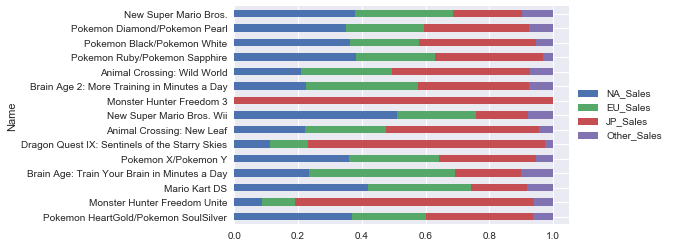

In [64]:
# top15_jp をX軸がゲームタイトル、Y軸が地域別販売シェアの
# 積み上げ横棒グラフとしてプロットしてください。
fig, ax = plt.subplots()
(top15_jp
 .apply(lambda x : x / top15_jp.sum(axis=1))
 .plot.barh(stacked=True, ax=ax))
ax.invert_yaxis()
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

グラフから読み取れることはなんですか？

その他地域での販売数が上位15のゲームタイトルの地域別販売数を抽出して可視化します。

In [65]:
# game_data からその他地域での販売数が上位15のゲームタイトルの
# 地域別販売数を抽出してください。結果を top15_other と名付けてください。
top15_other = (game_data
         .sort_values('Other_Sales', ascending=False)
         .head(15)[['Name'] + SALES]
         .set_index('Name'))
top15_eu.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Name,,,,
Wii Sports,41.49,29.02,3.77,8.46
Mario Kart Wii,15.85,12.88,3.79,3.31
Wii Sports Resort,15.75,11.01,3.28,2.96
Nintendogs,9.07,11.00,1.93,2.75
Grand Theft Auto V,7.01,9.27,0.97,4.14


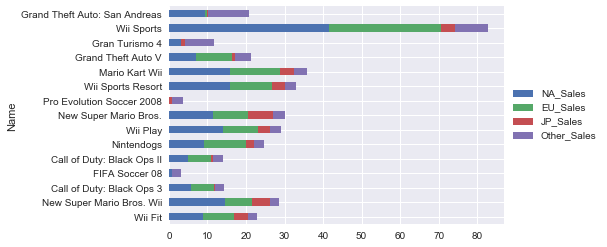

In [66]:
# top15_other をX軸がゲームタイトル、Y軸が地域別の販売数の
# 積み上げ横棒グラフとしてプロットしてください。
fig, ax = plt.subplots()
top15_other.plot.barh(stacked=True, ax=ax)
ax.invert_yaxis()
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

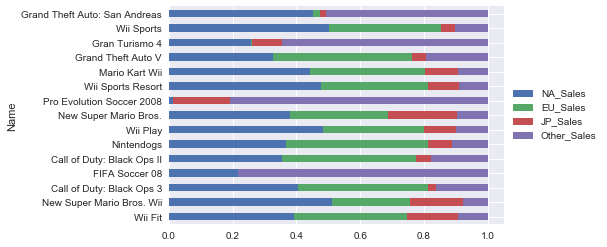

In [67]:
# top15_other をX軸がゲームタイトル、Y軸が地域別販売シェアの
# 積み上げ横棒グラフとしてプロットしてください。
fig, ax = plt.subplots()
(top15_other
 .apply(lambda x : x / top15_other.sum(axis=1))
 .plot.barh(stacked=True, ax=ax))
ax.invert_yaxis()
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

グラフから読み取れることはなんですか？

#### ジャンルごとの販売数の地域間の相関

ジャンルごとの各地域間の相関係数をヒートマップで確認してみます。

In [68]:
def corr_between_regions(df):
    corr = df.corr()
    names = ['NA', 'EU', 'JP', 'Other']
    result = pd.DataFrame()
    
    for i in range(4):
        for j in range(i + 1, 4):
            result[names[i] + ' - '  + names[j]] = [corr.iloc[i, j]]
            
    return result

In [69]:
corr_by_genre = (game_data
        .groupby('Genre')[SALES]
        .apply(corr_between_regions)
        .reset_index(level=1, drop=True))
corr_by_genre.head()

,NA - EU,NA - JP,NA - Other,EU - JP,EU - Other,JP - Other
Genre,,,,,,
Action,0.811324,0.253027,0.702575,0.256354,0.574444,0.194505
Adventure,0.778866,0.079872,0.798277,0.060069,0.905788,0.090911
Fighting,0.789932,0.601879,0.664431,0.463263,0.694936,0.378778
Misc,0.787905,0.311423,0.778366,0.542882,0.829368,0.396555
Platform,0.931409,0.855825,0.876973,0.849253,0.940878,0.797224


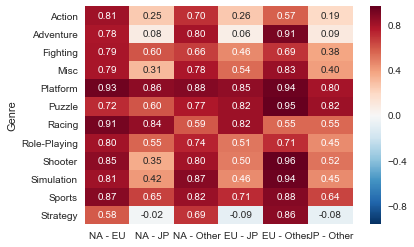

In [70]:
sns.heatmap(corr_by_genre, annot=True, fmt=".2f")

#### ジャンルごとの販売数の推移

ジャンルごとの全世界での販売数を時系列としてプロットします。

In [71]:
genre_year = (game_data.pivot_table('Global_Sales', ['Genre', 'Year'], aggfunc='sum')
              .reset_index())
genre_year.head(20)

,Genre,Year,Global_Sales
0,Action,2001,59.39
1,Action,2002,86.75
2,Action,2003,67.93
3,Action,2004,76.26
4,Action,2005,85.66
5,Action,2006,66.58
6,Action,2007,106.50
7,Action,2008,136.39
8,Action,2009,139.36
9,Action,2010,117.64


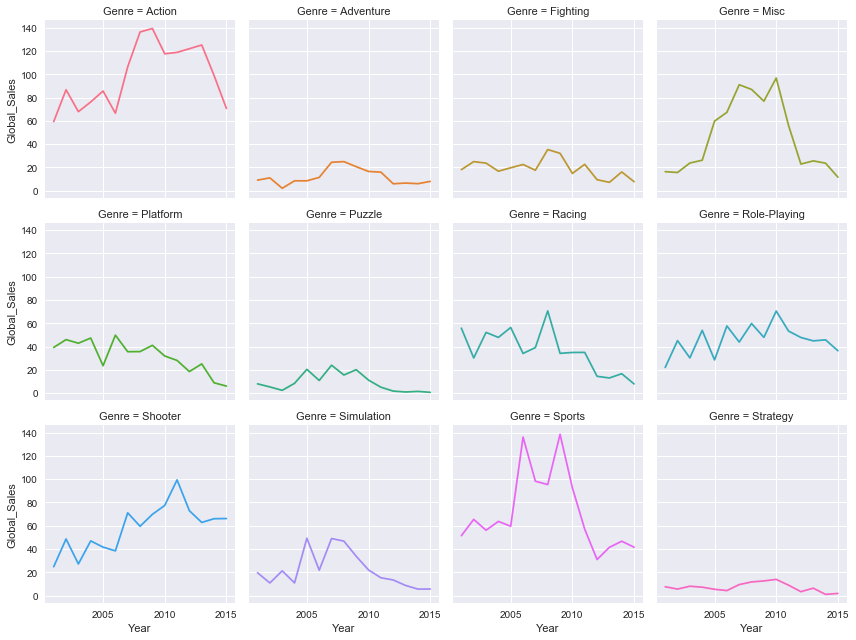

In [72]:
g = sns.FacetGrid(genre_year, col='Genre', hue='Genre', col_wrap=4)
g.map(plt.plot, 'Year', 'Global_Sales');